In [42]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage as ndi
from skimage import feature
import numpy as np

In [1]:
path_in = "D:/data-weather/rad_sat_mod/rad_256/"
path_out = "D:/data-weather/rad_sat_mod/rad_edge/"

In [11]:
filenames = []
directory = os.fsencode(path_in)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    filenames.append(filename)
filenames.sort()
print("Total number of files found: ", len(filenames))
print("First filename: ", filenames[0])

Total number of files found:  1411
First filename:  rad.20170102.14.png


In [12]:
img = Image.open(path_in+filenames[0])

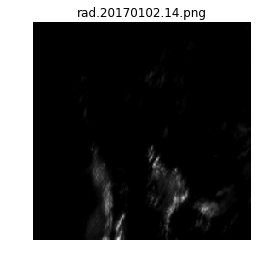

In [15]:
plt.title(filenames[0])
plt.axis('off')
plt.imshow(img)

In [17]:
blurr = ndi.gaussian_filter(img, 4)

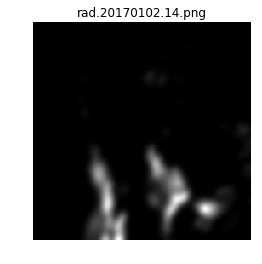

In [25]:
plt.title(filenames[0])
plt.axis('off')
plt.imshow(blurr, cmap='gray')

In [28]:
edges1 = feature.canny(blurr)
edges2 = feature.canny(blurr, sigma=2)

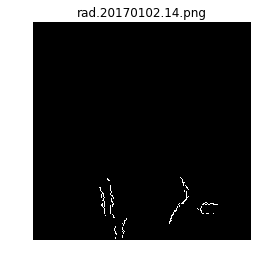

In [26]:
plt.title(filenames[0])
plt.axis('off')
plt.imshow(edges1, cmap='gray')

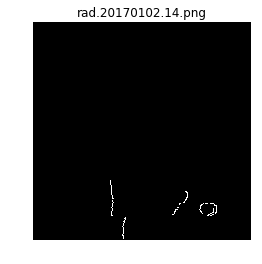

In [29]:
plt.title(filenames[0])
plt.axis('off')
plt.imshow(edges2, cmap='gray')

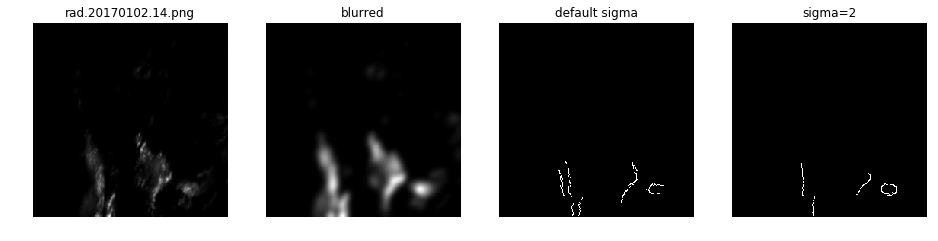

In [48]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(16,16))
ax0.set_title(filenames[0])
ax0.axis('off')
ax0.imshow(img, cmap='gray')
ax1.set_title("blurred")
ax1.axis('off')
ax1.imshow(blurr, cmap='gray')
ax2.set_title("default sigma")
ax2.axis('off')
ax2.imshow(edges1, cmap='gray')
ax3.set_title("sigma=2")
ax3.axis('off')
ax3.imshow(edges2, cmap='gray')

In [46]:
image = plt.imread(path_in+filenames[0])
print(image.shape)
blurred = ndi.gaussian_filter(img, 4)
print(blurred.shape)
edge1 = feature.canny(blurred)
print(edge1.shape)
edge2 = feature.canny(blurred, sigma=2)
print(edge2.shape)

(256, 256)
(256, 256)
(256, 256)
(256, 256)


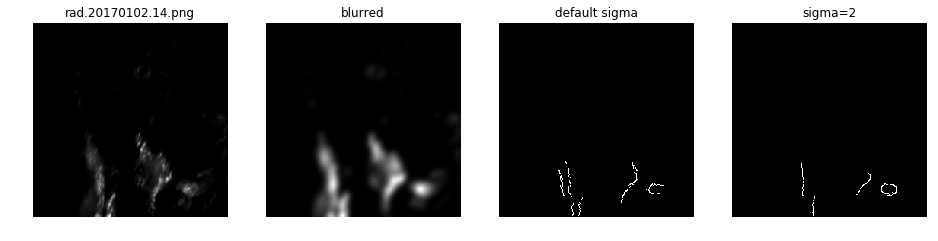

In [47]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(16,16))
ax0.set_title(filenames[0])
ax0.axis('off')
ax0.imshow(image, cmap='gray')
ax1.set_title("blurred")
ax1.axis('off')
ax1.imshow(blurred, cmap='gray')
ax2.set_title("default sigma")
ax2.axis('off')
ax2.imshow(edge1, cmap='gray')
ax3.set_title("sigma=2")
ax3.axis('off')
ax3.imshow(edge2, cmap='gray')

In [49]:
plt.imsave(path_out+filenames[0], edge1, cmap='gray')

In [50]:
images = []
for filename in filenames:
    images.append(plt.imread(path_in+filename))

In [51]:
print(len(images))

1411


In [52]:
images_blurred = []
for image in images:
    images_blurred.append(ndi.gaussian_filter(image, 4))
print(len(images_blurred))

1411


In [53]:
images_edge1 = []
for image_blurred in images_blurred:
    images_edge1.append(feature.canny(image_blurred))
print(len(images_edge1))

1411


In [54]:
for i in range(0, len(filenames)):
    plt.imsave(path_out+filenames[i], images_edge1[i], cmap='gray')

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
path_in = "D:/data-weather/rad_sat_mod/sa3_256/"
path_out = "D:/data-weather/rad_sat_mod/sa3_edge/"
filenames = []
directory = os.fsencode(path_in)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    filenames.append(filename)
filenames.sort()
print("Total number of files found: ", len(filenames))
print("First filename: ", filenames[0])
images = []
for filename in filenames:
    images.append(rgb2gray(plt.imread(path_in+filename)))
print(len(images))
images_blurred = []
for image in images:
    images_blurred.append(ndi.gaussian_filter(image, 4))
print(len(images_blurred))
images_edge1 = []
for image_blurred in images_blurred:
    images_edge1.append(feature.canny(image_blurred))
print(len(images_edge1))
for i in range(0, len(filenames)):
    plt.imsave(path_out+filenames[i], images_edge1[i], cmap='gray')

Total number of files found:  1411
First filename:  sat.20170102.14.png


(256, 256, 4)


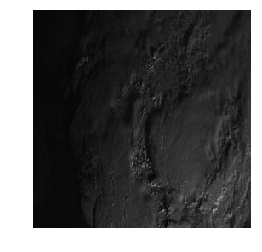

In [58]:
print(images[0].shape)
plt.axis('off')
plt.imshow(images[0])

<class 'numpy.ndarray'>
(256, 256, 4)


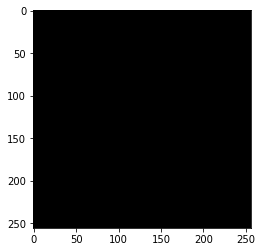

In [68]:
rex = plt.imread("D:/data-weather/rad_sat_mod/sa1_edge/sat.20170102.14.png")
print(type(rex))
print(rex.shape)
plt.imshow(rex)